In [1]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
from sklearn.utils import resample

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor #aware of the possibility of outliers
from sklearn.linear_model import RANSACRegressor #separate data into outliers and inliers and fits the model on the inliers
from sklearn.linear_model import TheilSenRegressor #fitting multiple regression models on subsets of the training data and combining the coefficients together
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.svm import SVR
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import validation_curve

# Load Data & Data Cleaning

In [2]:
# load dataset
trn = pd.read_csv('option_train.csv')
tst = pd.read_csv('option_test_wolabel.csv')

In [3]:
trn.head()

Value           S      K       tau        r     BS
0  21.670404  431.623898  420.0  0.341270  0.03013  Under
1   0.125000  427.015526  465.0  0.166667  0.03126   Over
2  20.691244  427.762336  415.0  0.265873  0.03116  Under
3   1.035002  451.711658  460.0  0.063492  0.02972   Over
4  39.553020  446.718974  410.0  0.166667  0.02962  Under

In [4]:
tst.head()

S    K       tau        r
0  431.618600  460  0.293651  0.03147
1  432.633296  420  0.182540  0.03147
2  432.633296  430  0.182540  0.03147
3  431.618600  415  0.293651  0.03147
4  434.772855  420  0.043651  0.03147

In [5]:
trn.isnull().sum()

Value    1
S        1
K        2
tau      1
r        0
BS       0
dtype: int64

In [6]:
trn.shape

(1680, 6)

In [7]:
trn.describe()

Value            S            K          tau            r
count  1679.000000  1679.000000  1678.000000  1679.000000  1680.000000
mean     15.072013   440.639445   438.241955     0.437519     0.030235
std      14.036492    13.130436    23.408989     7.057555     0.000557
min       0.125000     0.000000   375.000000     0.003968     0.029510
25%       2.255002   433.863864   420.000000     0.119048     0.029820
50%      11.220588   442.525366   440.000000     0.202381     0.030130
75%      25.745904   447.320414   455.000000     0.285714     0.030540
max      60.149367   455.880619   500.000000   250.000000     0.031880

In [8]:
trn.dropna(inplace=True)

In [9]:
trn.shape

(1678, 6)

## tau

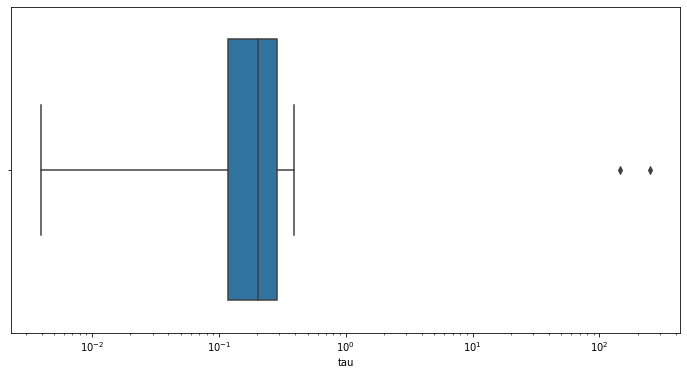

In [10]:
plt.figure(figsize=(12,6))
plt.xscale('log')
ax = sns.boxplot(x=trn['tau'], data=trn)


In [11]:
trn = trn.drop(trn[trn.tau >= 100 ].index)

In [12]:
trn.shape

(1676, 6)

## S

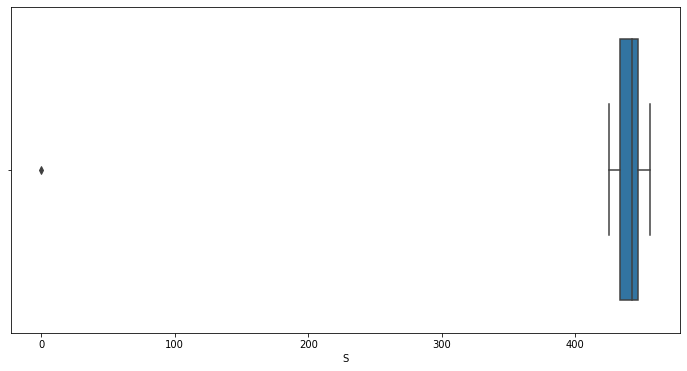

In [13]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x=trn['S'], data=trn)


In [14]:
trn = trn.drop(trn[trn.S == 0 ].index)

In [15]:
trn.shape

(1675, 6)

## K

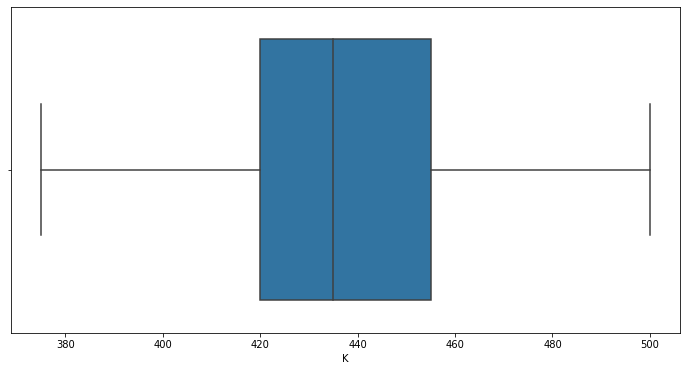

In [16]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x=trn['K'], data=trn)


## Value

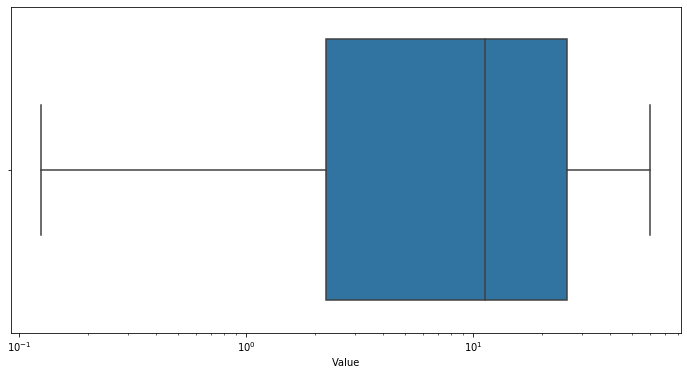

In [17]:
plt.figure(figsize=(12,6))
plt.xscale('log')
ax = sns.boxplot(x=trn['Value'], data=trn)

## BS

In [18]:
trn['BS']=np.where(trn['BS']=='Over',1,0)

In [19]:
trn.isnull().sum()

Value    0
S        0
K        0
tau      0
r        0
BS       0
dtype: int64

In [20]:
trn.describe()

Value            S            K          tau            r  \
count  1675.000000  1675.000000  1675.000000  1675.000000  1675.000000   
mean     15.097481   440.900665   438.202985     0.201907     0.030236   
std      14.043011     7.527414    23.409897     0.099833     0.000558   
min       0.125000   425.472331   375.000000     0.003968     0.029510   
25%       2.237501   433.875313   420.000000     0.119048     0.029820   
50%      11.250000   442.525366   435.000000     0.202381     0.030130   
75%      25.784245   447.320414   455.000000     0.285714     0.030540   
max      60.149367   455.880619   500.000000     0.392857     0.031880   

                BS  
count  1675.000000  
mean      0.435224  
std       0.495934  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [21]:
trn.shape

(1675, 6)

## Standardize

In [22]:
X_no_scaling = trn.drop(['Value','BS'], axis= 1)
X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()
y = trn.Value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# 1. Linear regression 

In [23]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
pred = model_LR.predict(X_test)
LR_score = r2_score(y_test, pred)
LR_score

0.9169097583753002

In [24]:
model_LR_cv = LinearRegression()
kfolds_regresssion = KFold(n_splits = 10, shuffle = True) 
model_LR_cv.fit(X, y)
LR_score_cv = cross_val_score(model_LR_cv, X, y, cv=kfolds_regresssion, scoring='r2', n_jobs=-1)    
print(LR_score_cv)
print(f'Mean R squared: ', LR_score_cv.mean())

[0.90661882 0.90687651 0.89319548 0.8959839  0.91768653 0.9131086
 0.92912676 0.91137576 0.91066652 0.9118625 ]
Mean R squared:  0.9096501394795375


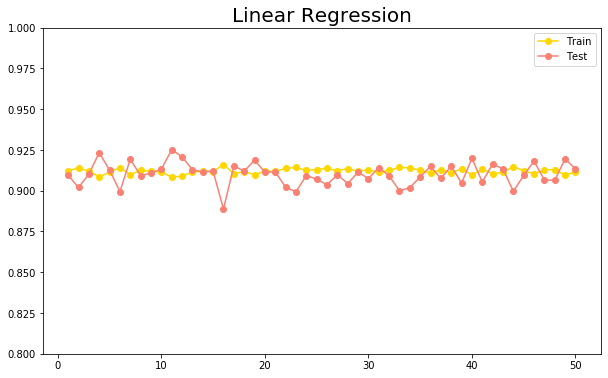

In [51]:
import matplotlib.pyplot as plt

train_scores, test_scores = list(), list()
values = [i for i in range(1, 51)]
for i in values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    model = LinearRegression()
    model.fit(X_train, y_train)
    pred_trn = model.predict(X_train)
    trn_score = r2_score(y_train, pred_trn)
    train_scores.append(trn_score)
    pred_tst = model.predict(X_test)
    tst_score = r2_score(y_test, pred_tst)
    test_scores.append(tst_score)
    
plt.figure(figsize=(10,6))
plt.plot(values, train_scores, '-o', label='Train', c='gold')
plt.plot(values, test_scores, '-o', label='Test', c='salmon')
plt.ylim(0.8,1)
plt.legend()
plt.title('Linear Regression', fontsize=20)
plt.show()

# Huber regression

In [17]:
model_HR = HuberRegressor()
model_HR.fit(X_train, y_train)
pred = model_HR.predict(X_test)
HR_score = r2_score(y_test, pred)
HR_score

0.8769678875910495

In [18]:
model_HR_cv = HuberRegressor()
kfolds_regresssion = KFold(n_splits = 10, shuffle = True) 
model_HR_cv.fit(X, y)
HR_score_cv = cross_val_score(model_HR_cv, X, y, cv=kfolds_regresssion, scoring='r2', n_jobs=-1)    
print(HR_score_cv)
print(f'Mean R squared: ', HR_score_cv.mean())

[ 0.8779859   0.84728133  0.85625763  0.86871649  0.84243798  0.84943383
  0.85760731  0.87055782  0.84785159 -1.12757992]
Mean R squared:  0.6590549964157998


# RANSAC regression

In [19]:
model_RANSACR = RANSACRegressor()
model_RANSACR.fit(X_train, y_train)
pred = model_RANSACR.predict(X_test)
RANSACR_score = r2_score(y_test, pred)
RANSACR_score

0.9105423987470576

In [20]:
model_RANSACR_cv = RANSACRegressor()
kfolds_regresssion = KFold(n_splits = 10, shuffle = True) 
model_RANSACR_cv.fit(X, y)
RANSACR_score_cv = cross_val_score(model_RANSACR_cv, X, y, cv=kfolds_regresssion, scoring='r2', n_jobs=-1)    
print(RANSACR_score_cv)
print(f'Mean R squared: ', RANSACR_score_cv.mean())

[ 8.98068899e-01  7.34573401e-01  8.71518782e-01  8.68720946e-01
 -2.12343769e+00 -1.09335066e+03  8.93055887e-01  8.63308761e-01
  8.97051965e-01 -6.25185213e+02]
Mean R squared:  -171.46330073891355


# TheilSen regression


In [21]:
model_TSR = TheilSenRegressor()
model_TSR.fit(X_train, y_train)
pred = model_TSR.predict(X_test)
TSR_score = r2_score(y_test, pred)
TSR_score

0.8960262779817093

In [22]:
model_TSR_cv = TheilSenRegressor()
kfolds_regresssion = KFold(n_splits = 10, shuffle = True) 
model_TSR_cv.fit(X, y)
TSR_score_cv = cross_val_score(model_TSR_cv, X, y, cv=kfolds_regresssion, scoring='r2', n_jobs=-1)    
print(TSR_score_cv)
print(f'Mean R squared: ', TSR_score_cv.mean())

[-4.26930482e+02  8.19296925e-01  8.20562664e-01  9.12479041e-01
  9.08461570e-01 -1.78908390e+00  9.00687035e-01  8.44216832e-01
  8.56772484e-01 -1.37684995e+03]
Mean R squared:  -179.95070429365293


# Polynomial regression


In [23]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)
model = LinearRegression()
model.fit(X_poly, y_train)
pred = model.predict(poly.fit_transform(X_test))
PR_score = r2_score(y_test, pred)
PR_score 

0.999084445351896

In [24]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)
kfolds_regresssion = KFold(n_splits = 10, shuffle = True) 
model_cv = LinearRegression()
model_cv.fit(X_poly, y_train)
PR_score_cv = cross_val_score(model_cv, X, y, cv=kfolds_regresssion, scoring='r2', n_jobs=-1)    
print(PR_score_cv)
print(f'Mean R squared: ', PR_score_cv.mean())

[ 0.81945668  0.81972905  0.82157708  0.80957678  0.81742299  0.83907844
  0.80690938  0.85163554  0.82250688 -1.02209954]
Mean R squared:  0.6385793283661068


# 2. KNN regression


In [26]:
model_KNNR = KNeighborsRegressor()
model_KNNR.fit(X_train, y_train)
pred = model_KNNR.predict(X_test)
KNNR_score = r2_score(y_test, pred)
KNNR_score

0.9832478261724411

In [27]:
model_KNNR_cv = KNeighborsRegressor()
kfolds_regresssion = KFold(n_splits = 10, shuffle = True) 
model_KNNR_cv.fit(X, y)
KNNR_score_cv = cross_val_score(model_KNNR_cv, X, y, cv=kfolds_regresssion, scoring='r2', n_jobs=-1)    
print(KNNR_score_cv)
print(f'Mean R squared: ', KNNR_score_cv.mean())

[0.97729452 0.97968331 0.97824328 0.9744623  0.98052897 0.98167084
 0.98037595 0.98295566 0.98284912 0.98465148]
Mean R squared:  0.9802715422447337


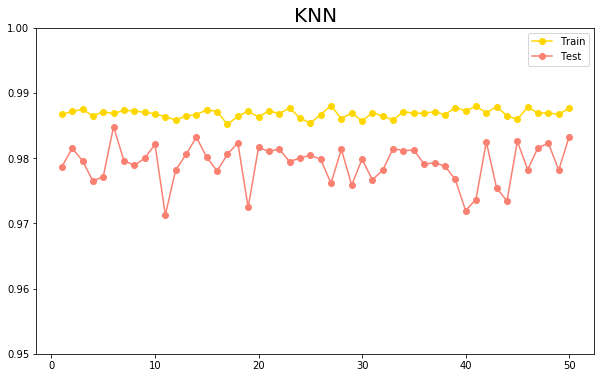

In [52]:
import matplotlib.pyplot as plt

train_scores, test_scores = list(), list()
values = [i for i in range(1, 51)]
for i in values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=i)
    model = KNeighborsRegressor()
    model.fit(X_train, y_train)
    pred_trn = model.predict(X_train)
    trn_score = r2_score(y_train, pred_trn)
    train_scores.append(trn_score)
    pred_tst = model.predict(X_test)
    tst_score = r2_score(y_test, pred_tst)
    test_scores.append(tst_score)
    
plt.figure(figsize=(10,6))
plt.plot(values, train_scores, '-o', label='Train', c='gold')
plt.plot(values, test_scores, '-o', label='Test', c='salmon')
plt.ylim(0.95,1)
plt.title('KNN', fontsize=20)

plt.legend()
plt.show()

# 3. Decision Tree regression


In [29]:
model_DTR = DecisionTreeRegressor()
model_DTR.fit(X_train, y_train)
pred = model_DTR.predict(X_test)
DTR_score = r2_score(y_test, pred)
DTR_score

0.9908349249451831

In [30]:
model_DTR_cv = DecisionTreeRegressor()
kfolds_regresssion = KFold(n_splits = 10, shuffle = True) 
model_DTR_cv.fit(X, y)
DTR_score_cv = cross_val_score(model_DTR_cv, X, y, cv=kfolds_regresssion, scoring='r2', n_jobs=-1)    
print(DTR_score_cv)
print(f'Mean R squared: ', DTR_score_cv.mean())

[0.99360729 0.99501075 0.99162957 0.98974767 0.99402244 0.9932367
 0.99348691 0.99279998 0.9895556  0.99271779]
Mean R squared:  0.9925814698447997


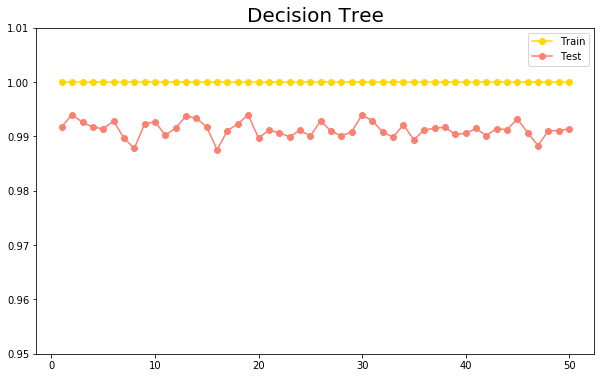

In [54]:
import matplotlib.pyplot as plt

train_scores, test_scores = list(), list()
values = [i for i in range(1, 51)]
for i in values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=i)
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    pred_trn = model.predict(X_train)
    trn_score = r2_score(y_train, pred_trn)
    train_scores.append(trn_score)
    pred_tst = model.predict(X_test)
    tst_score = r2_score(y_test, pred_tst)
    test_scores.append(tst_score)
    
plt.figure(figsize=(10,6))
plt.plot(values, train_scores, '-o', label='Train', c='gold')
plt.plot(values, test_scores, '-o', label='Test', c='salmon')
plt.title('Decision Tree', fontsize=20)
plt.ylim(0.95,1.01)
plt.legend()
plt.show()

# 4. Boosted Tree regression


In [32]:
model_BT = lgb.LGBMRegressor()
model_BT.fit(X_train, y_train)
pred = model_BT.predict(X_test)
BT_score = r2_score(y_test, pred)
BT_score

0.9954934143807461

In [33]:
model_BT_cv = lgb.LGBMRegressor()
kfolds_regresssion = KFold(n_splits = 10, shuffle = True) 
model_BT_cv.fit(X, y)
BT_score_cv = cross_val_score(model_BT_cv, X, y, cv=kfolds_regresssion, scoring='r2', n_jobs=-1)    
print(BT_score_cv)
print(f'Mean R squared: ', BT_score_cv.mean())

[0.99668302 0.99787227 0.9965948  0.98982396 0.99494076 0.99826275
 0.99422722 0.99772211 0.99503745 0.99488901]
Mean R squared:  0.99560533577158


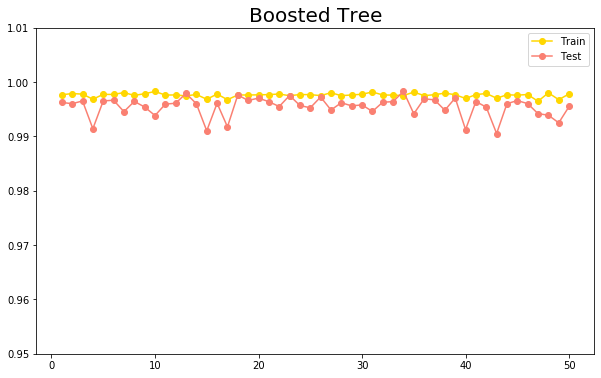

In [55]:
import matplotlib.pyplot as plt

train_scores, test_scores = list(), list()
values = [i for i in range(1, 51)]
for i in values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=i)
    model = lgb.LGBMRegressor()
    model.fit(X_train, y_train)
    pred_trn = model.predict(X_train)
    trn_score = r2_score(y_train, pred_trn)
    train_scores.append(trn_score)
    pred_tst = model.predict(X_test)
    tst_score = r2_score(y_test, pred_tst)
    test_scores.append(tst_score)
    
plt.figure(figsize=(10,6))
plt.plot(values, train_scores, '-o', label='Train', c='gold')
plt.plot(values, test_scores, '-o', label='Test', c='salmon')
plt.ylim(0.95,1.01)
plt.title('Boosted Tree', fontsize=20)

plt.legend()
plt.show()

# 5. Random Forest regression

In [35]:
model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, y_train)
pred = model_RFR.predict(X_test)
RFR_score = r2_score(y_test, pred)
RFR_score 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9947090093391807

In [36]:
model_RFR_cv = RandomForestRegressor()
kfolds_regresssion = KFold(n_splits = 10, shuffle = True) 
model_RFR_cv.fit(X, y)
RFR_score_cv = cross_val_score(model_RFR_cv, X, y, cv=kfolds_regresssion, scoring='r2', n_jobs=-1)    
print(RFR_score_cv)
print(f'Mean R squared: ', RFR_score_cv.mean())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.99556241 0.99607038 0.99672457 0.99474451 0.99297855 0.99487727
 0.99546047 0.99500434 0.99654982 0.99581053]
Mean R squared:  0.9953782848689761


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

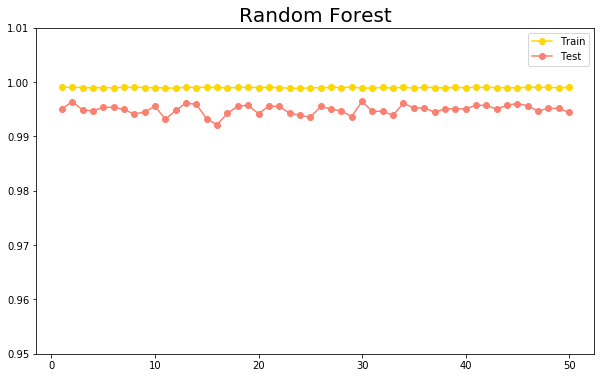

In [56]:
import matplotlib.pyplot as plt

train_scores, test_scores = list(), list()
values = [i for i in range(1, 51)]
for i in values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=i)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    pred_trn = model.predict(X_train)
    trn_score = r2_score(y_train, pred_trn)
    train_scores.append(trn_score)
    pred_tst = model.predict(X_test)
    tst_score = r2_score(y_test, pred_tst)
    test_scores.append(tst_score)
    
plt.figure(figsize=(10,6))
plt.plot(values, train_scores, '-o', label='Train', c='gold')
plt.plot(values, test_scores, '-o', label='Test', c='salmon')
plt.ylim(0.95,1.01)
plt.title('Random Forest', fontsize=20)

plt.legend()
plt.show()

# 6. XG Boost Regression

In [38]:
model_XGB = XGBRegressor()
model_XGB.fit(X_train, y_train)
pred = model_XGB.predict(X_test)
XGB_score = r2_score(y_test, pred)
XGB_score

0.9979811320897458

In [39]:
model_XGB_cv = XGBRegressor()
kfolds_regresssion = KFold(n_splits = 10, shuffle = True) 
model_XGB_cv.fit(X, y)
XGB_score_cv = cross_val_score(model_XGB_cv, X, y, cv=kfolds_regresssion, scoring='r2', n_jobs=-1)    
print(XGB_score_cv )
print(f'Mean R squared: ', XGB_score_cv .mean())

[0.99806525 0.99785831 0.99849125 0.99874685 0.99795009 0.9984562
 0.99851003 0.99814531 0.99864323 0.99787594]
Mean R squared:  0.9982742459662746


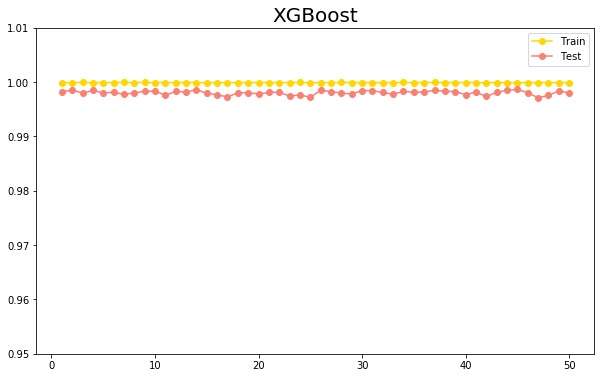

In [57]:
import matplotlib.pyplot as plt

train_scores, test_scores = list(), list()
values = [i for i in range(1, 51)]
for i in values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=i)
    model = XGBRegressor()
    model.fit(X_train, y_train)
    pred_trn = model.predict(X_train)
    trn_score = r2_score(y_train, pred_trn)
    train_scores.append(trn_score)
    pred_tst = model.predict(X_test)
    tst_score = r2_score(y_test, pred_tst)
    test_scores.append(tst_score)
    
plt.figure(figsize=(10,6))
plt.plot(values, train_scores, '-o', label='Train', c='gold')
plt.plot(values, test_scores, '-o', label='Test', c='salmon')
plt.ylim(0.95,1.01)
plt.title('XGBoost', fontsize=20)
plt.legend()
plt.show()

# 7. Support Vector regression

In [41]:
model_SVR = SVR()
model_SVR.fit(X_train, y_train)
pred = model_SVR.predict(X_test)
SVR_score = r2_score(y_test, pred)
SVR_score 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.980710546474441

In [42]:
model_SVR_cv = SVR()
kfolds_regresssion = KFold(n_splits = 10, shuffle = True) 
model_SVR_cv.fit(X, y)
SVR_score_cv = cross_val_score(model_SVR_cv, X, y, cv=kfolds_regresssion, scoring='r2', n_jobs=-1)    
print(SVR_score_cv)
print(f'Mean R squared: ', SVR_score_cv.mean())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.96926887 0.96128797 0.96545474 0.98570999 0.97631643 0.99283111
 0.97762876 0.98813213 0.98339767 0.97140316]
Mean R squared:  0.9771430837765344


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

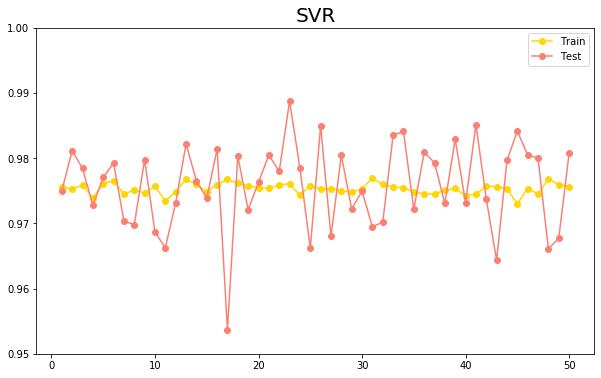

In [58]:
import matplotlib.pyplot as plt

train_scores, test_scores = list(), list()
values = [i for i in range(1, 51)]
for i in values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=i)
    model = SVR()
    model.fit(X_train, y_train)
    pred_trn = model.predict(X_train)
    trn_score = r2_score(y_train, pred_trn)
    train_scores.append(trn_score)
    pred_tst = model.predict(X_test)
    tst_score = r2_score(y_test, pred_tst)
    test_scores.append(tst_score)
    
plt.figure(figsize=(10,6))
plt.plot(values, train_scores, '-o', label='Train', c='gold')
plt.plot(values, test_scores, '-o', label='Test', c='salmon')
plt.ylim(0.95,1)
plt.title('SVR', fontsize=20)
plt.legend()
plt.show()

# 8. NN

In [44]:
model_NN = MLPRegressor()
model_NN.fit(X_train, y_train)
pred = model_NN.predict(X_test)
NN_score = r2_score(y_test, pred)
NN_score 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.996760753880477

In [45]:
model_NN_cv = MLPRegressor()
kfolds_regresssion = KFold(n_splits = 10, shuffle = True) 
model_NN_cv.fit(X, y)
NN_score_cv = cross_val_score(model_NN_cv, X, y, cv=kfolds_regresssion, scoring='r2', n_jobs=-1)    
print(NN_score_cv)
print(f'Mean R squared: ', NN_score_cv.mean())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.99786858 0.99705127 0.99624364 0.99761242 0.99670544 0.99690963
 0.99765347 0.99701749 0.99638591 0.99685556]
Mean R squared:  0.9970303423740212


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

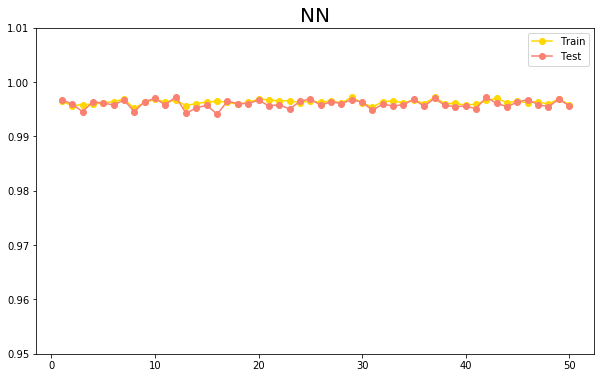

In [59]:
import matplotlib.pyplot as plt

train_scores, test_scores = list(), list()
values = [i for i in range(1, 51)]
for i in values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=i)
    model = MLPRegressor()
    model.fit(X_train, y_train)
    pred_trn = model.predict(X_train)
    trn_score = r2_score(y_train, pred_trn)
    train_scores.append(trn_score)
    pred_tst = model.predict(X_test)
    tst_score = r2_score(y_test, pred_tst)
    test_scores.append(tst_score)
    
plt.figure(figsize=(10,6))
plt.plot(values, train_scores, '-o', label='Train', c='gold')
plt.plot(values, test_scores, '-o', label='Test', c='salmon')
plt.title('NN', fontsize=20) 
plt.ylim(0.95,1.01)
plt.legend()
plt.show()

# Model comparison

In [47]:
score = []
score.append([LR_score,KNNR_score,DTR_score,BT_score,RFR_score,XGB_score, SVR_score,NN_score])
score

[[0.9169097583753002,
  0.9832478261724411,
  0.9908349249451831,
  0.9954934143807461,
  0.9947090093391807,
  0.9979811320897458,
  0.980710546474441,
  0.996760753880477]]

In [48]:
score_cv = []
score_cv.append([LR_score_cv.mean(),KNNR_score_cv.mean(),DTR_score_cv.mean(),BT_score_cv.mean(),RFR_score_cv.mean(),XGB_score_cv.mean(),SVR_score_cv.mean(),NN_score_cv.mean()])
score_cv

[[0.9096501394795375,
  0.9802715422447337,
  0.9925814698447997,
  0.99560533577158,
  0.9953782848689761,
  0.9982742459662746,
  0.9771430837765344,
  0.9970303423740212]]

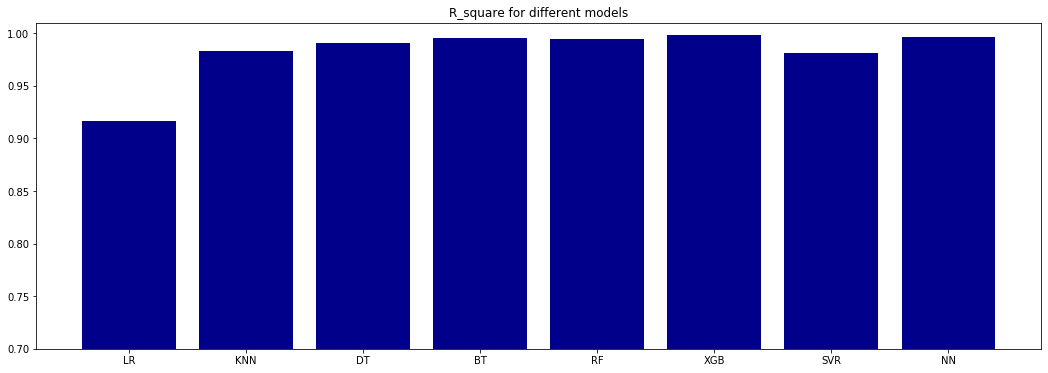

In [60]:
# score = pd.DataFrame(score, columns=['LR','HR','RANSACR','TSR','PR','KNNR','DTR','RFR','SVR'])
plt.figure(figsize=(18,6))
plt.ylim(0,1)
plt.bar(np.array(['LR','KNN','DT','BT','RF','XGB','SVR','NN']),np.array([
  0.9169097583753002,
  0.9832478261724411,
  0.9908349249451831,
  0.9954934143807461,
  0.9947090093391807,
  0.9979811320897458,
  0.980710546474441,
  0.996760753880477]), color='darkblue')
# score.T.plot(kind='bar', color='darkblue')
plt.ylim(0.7,1.01)
plt.title('R_square for different models')
plt.show()


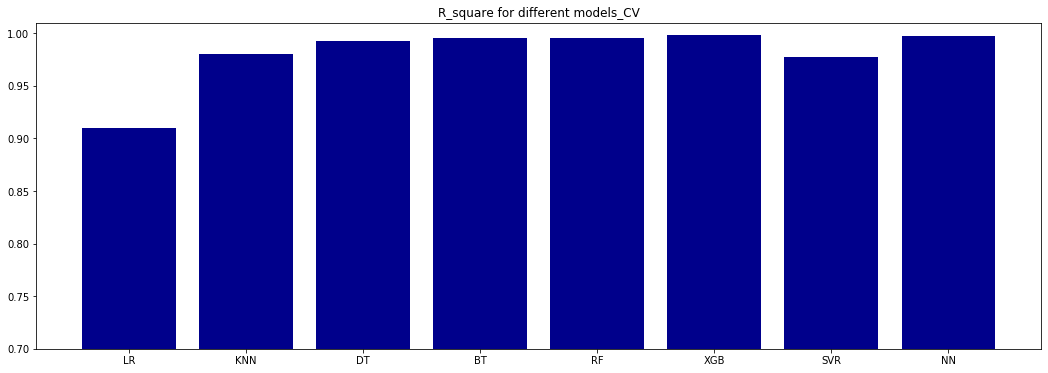

In [61]:
# score = pd.DataFrame(score, columns=['LR','HR','RANSACR','TSR','PR','KNNR','DTR','RFR','SVR'])
plt.figure(figsize=(18,6))
plt.ylim(0,1)
plt.bar(np.array(['LR','KNN','DT','BT','RF','XGB','SVR','NN']),np.array([
  0.9096501394795375,
  0.9802715422447337,
  0.9925814698447997,
  0.99560533577158,
  0.9953782848689761,
  0.9982742459662746,
  0.9771430837765344,
  0.9970303423740212]), color='darkblue')
# score.T.plot(kind='bar', color='darkblue')
plt.ylim(0.7,1.01)
plt.title('R_square for different models_CV')
plt.show()


# Make prediction on test dataset

In [62]:
X_no_scaling_validate = tst
X_validate = (X_no_scaling_validate - X_no_scaling_validate.mean()) / X_no_scaling_validate.std()


In [63]:
# model_RFR = RandomForestRegressor()
# model_RFR.fit(X_train, y_train)
pred = model_XGB_cv.predict(X_validate)
output = pd.DataFrame(pred)
output.to_csv('reg_output.csv')

In [64]:
output

0
0      1.906465
1     17.382544
2     11.547721
3     22.847532
4     16.013943
...         ...
1115  11.702241
1116   0.433747
1117   0.812320
1118  24.417522
1119  15.392921

[1120 rows x 1 columns]

In [53]:
# values = trn.values

# n_iterations = 10  #No. of bootstrap samples to be repeated (created)
# n_size = int(len(trn) * 0.70) #Size of sample, picking only 70% of the given data in every bootstrap sample

# #Lets run Bootstrap
# stats = []
# for i in range(n_iterations):

#     #prepare train & test sets
#     train = resample(values, n_samples = n_size) #Sampling with replacement..whichever is not used in training data will be used in test data
#     test = np.array([x for x in values if x.tolist() not in train.tolist()]) #picking rest of the data not considered in training sample
    
#     #fit model
#     model = LinearRegression()
#     model.fit(train[:,1:5], train[:,0]) #model.fit(X_train,y_train) i.e model.fit(train set, train label as it is a classifier)
    
#     #evaluate model
#     predictions = model.predict(test[:,1:5]) #model.predict(X_test)
#     score = r2_score(test[:,0], predictions) #accuracy_score(y_test, y_pred)
#     #caution, overall accuracy score can mislead when classes are imbalanced
    
#     stats.append(score)
#     print(score)
# print(f'Mean R squared:',np.mean(stats))